<a href="https://colab.research.google.com/github/jeguns/EP7173/blob/main/Unidad%2004/04_Tratamiento_de_valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [1]:
pip install pandas==1.5.3 &> /dev/null

In [2]:
pip install outlier_utils  &> /dev/null

In [3]:
pip install outliers  &> /dev/null

In [4]:
pip install PyAstronomy  &> /dev/null

# Lectura de datos

El archivo Postulantes.xlsx contiene los siguientes datos acerca de los postulantes a la UNALM:

- Edad, en años

- Puntaje RM, toma como máximo el valor 24

- Puntaje RV, toma como máximo el valor 24

- Puntaje Biología, toma como máximo el valor 6

- Puntaje Economía, toma como máximo el valor 4

- Tiempo, desde que terminó el colegio, en años

In [5]:
import pandas as pd

In [6]:
datos1 = pd.read_excel('04_Postulantes.xlsx', )
datos1

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,17,20.32,15.64,6.00,1.66,1
1,26,24.00,15.81,2.49,-0.17,10
2,23,19.15,17.15,1.49,0.83,7
3,18,16.49,15.32,5.00,2.00,2
4,20,17.98,16.81,2.49,1.66,4
...,...,...,...,...,...,...
1825,17,2.66,1.77,2.66,-0.51,1
1826,20,-0.23,6.45,-1.02,-0.68,4
1827,20,2.96,6.96,-0.68,-0.34,3
1828,19,2.64,3.94,0.32,-0.51,3


# Inspección gráfica

array([[<Axes: title={'center': 'EDAD'}>,
        <Axes: title={'center': 'PUNTAJE RM'}>],
       [<Axes: title={'center': 'PUNTAJE RV'}>,
        <Axes: title={'center': 'PUNTAJE BIOLOGÍA'}>],
       [<Axes: title={'center': 'PUNTAJE ECONOMÍA'}>,
        <Axes: title={'center': 'TIEMPO'}>]], dtype=object)

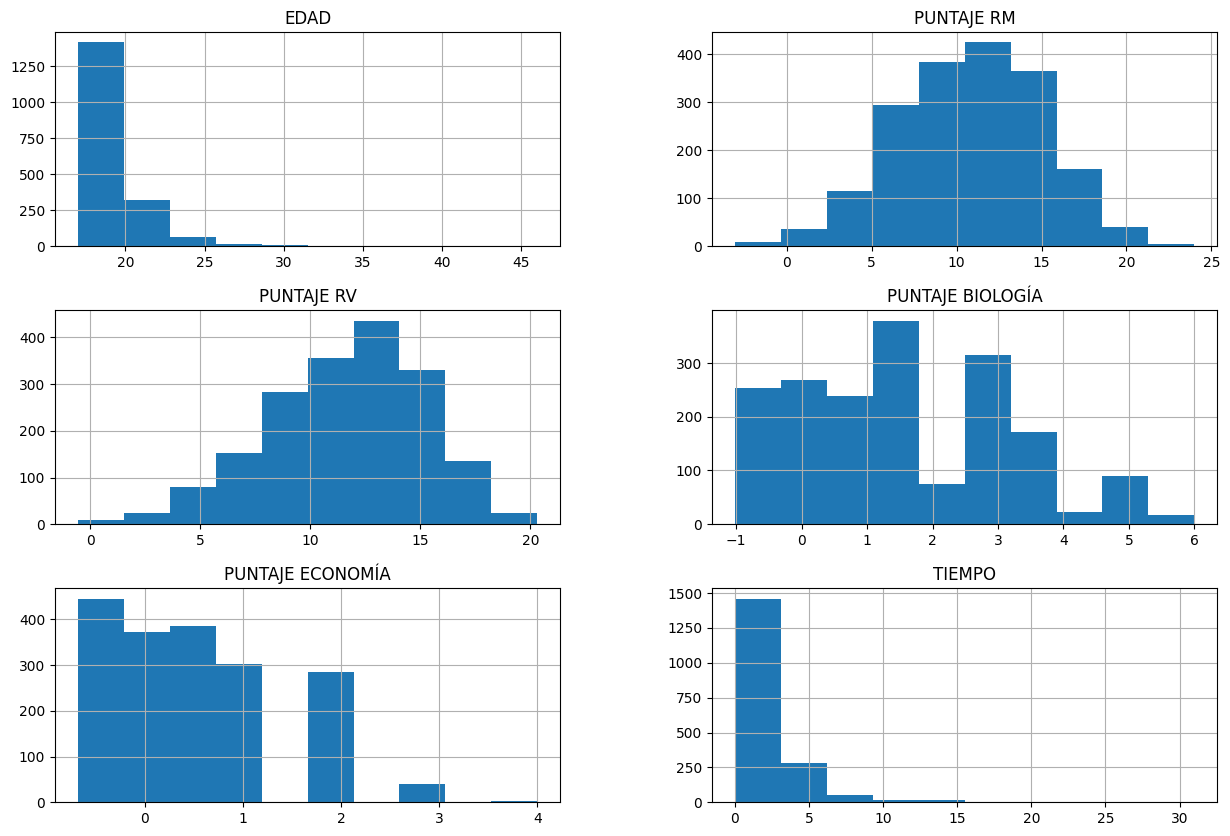

In [7]:
datos1.hist(bins=10,figsize=(15,10))

Analizando la asimetría

In [8]:
datos1['EDAD'].skew() # Para obtener el coeficiente de asimetría de una variable

4.504444468214552

In [9]:
datos1.apply(lambda x: x.skew()).to_frame("Asimetría") # Para obtener el coeficiente de asimetría de todas las variables

,Asimetría
EDAD,4.504444
PUNTAJE RM,-0.129607
PUNTAJE RV,-0.371260
PUNTAJE BIOLOGÍA,0.498668
PUNTAJE ECONOMÍA,0.716261
TIEMPO,4.390053


Realizamos una prueba de hipótesis sobre el coeficiente de asimetría

$H0: as = 0$

$H1: as \neq 0$

Si $pvalor < \alpha$, se rechaza la hipótesis nula

In [10]:
from scipy.stats import skewtest
datos1.apply(lambda x: skewtest(x, nan_policy='omit'))

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,3.460478e+01,-2.261514,-6.301819e+00,8.274466e+00,1.134103e+01,3.424041e+01
1,2.141025e-262,0.023727,2.941724e-10,1.290326e-16,8.217580e-30,6.059359e-257


A un nivel de significancia $\alpha=0.01$, se rechaza la hipótesis nula para las variables ..., mientras que ... Por lo tanto

<Axes: >

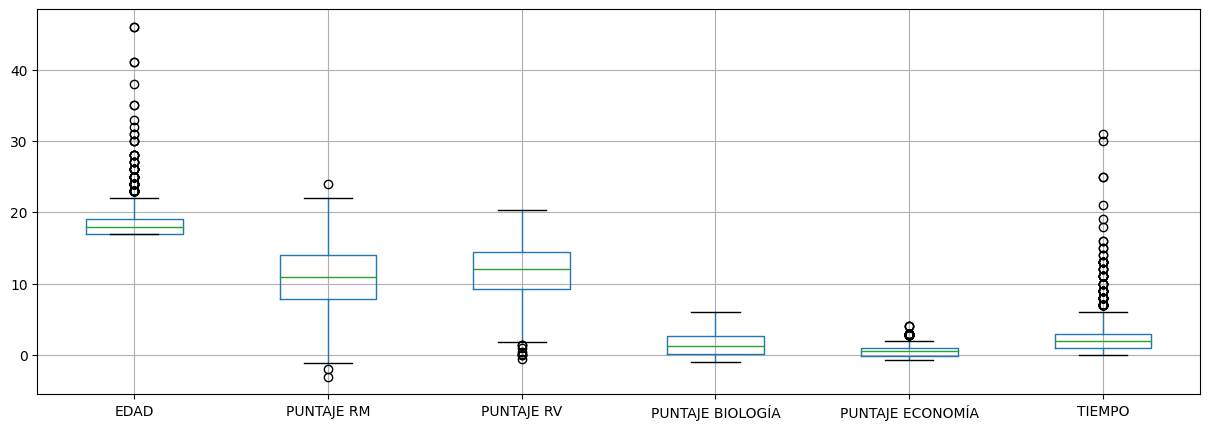

In [11]:
datos1.boxplot(figsize=(15,5))

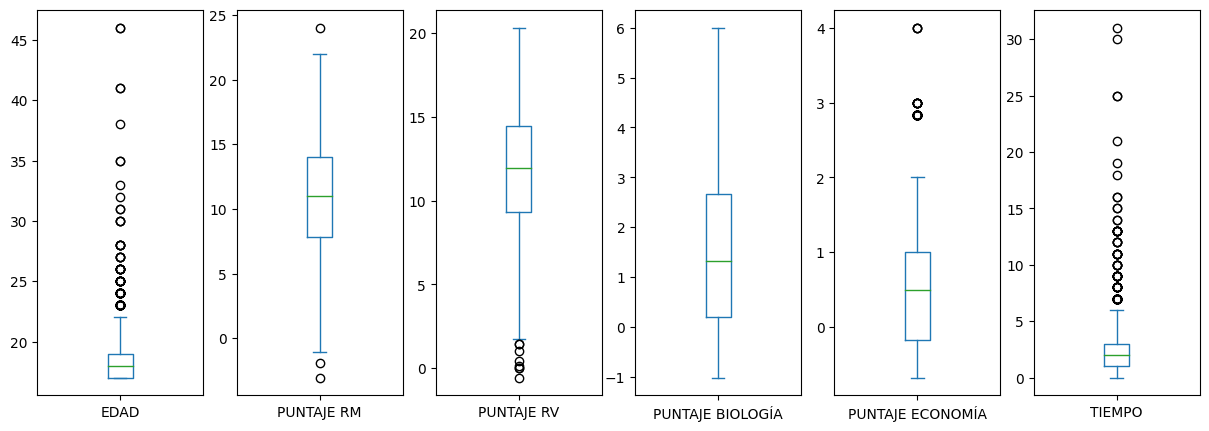

In [12]:
import matplotlib as plt
datos1.plot(kind='box', subplots=True, sharey=False, figsize=(15,5));

Verificando normalidad de los datos:

$H_0$: ...

$H_1$: ...

In [13]:
from scipy.stats import shapiro
stat, p_valor = shapiro(datos1['EDAD'])
p_valor

1.8460720382249025e-52

In [14]:
datos1.apply(lambda x: shapiro(x))

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,6.334514e-01,0.995547,9.892486e-01,9.618472e-01,9.278397e-01,6.125509e-01
1,1.846072e-52,0.000030,2.060863e-10,1.530332e-21,8.159820e-29,2.138103e-53


En conclusión, ...

In [15]:
datos1.describe()

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000
mean,18.792896,10.830066,11.638978,1.536388,0.475716,2.616393
std,2.356257,4.255012,3.534440,1.606505,0.864303,2.456478
min,17.000000,-3.060000,-0.570000,-1.020000,-0.680000,0.000000
25%,17.000000,7.810000,9.300000,0.192500,-0.170000,1.000000
50%,18.000000,10.980000,11.980000,1.320000,0.490000,2.000000
75%,19.000000,13.980000,14.470000,2.660000,1.000000,3.000000
max,46.000000,24.000000,20.320000,6.000000,4.000000,31.000000


# **Filtros**

## Filtro z-score

In [16]:
import numpy as np
from scipy.stats import zscore

In [17]:
datos1_zscore = datos1.apply(zscore).abs()
datos1_zscore

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,0.761117,2.230905,1.132320,2.779220,1.370594,0.658192
1,3.059545,3.096004,1.180431,0.593756,0.747299,3.006591
2,1.785991,1.955860,1.559661,0.028883,0.410020,1.784996
3,0.336599,1.330544,1.041757,2.156581,1.764082,0.250994
4,0.512437,1.680815,1.463438,0.593756,1.370594,0.563402
...,...,...,...,...,...,...
1825,0.761117,1.920629,2.792996,0.699605,1.140787,0.658192
1826,0.512437,2.600013,1.468520,1.591707,1.337531,0.563402
1827,0.512437,1.850104,1.324186,1.380010,0.944043,0.156204
1828,0.087919,1.925330,2.178869,0.757371,1.140787,0.156204


### RM

In [18]:
filtro_zscore_rm = datos1_zscore['PUNTAJE RM'] >3
filtro_zscore_rm

,PUNTAJE RM
0,False
1,True
2,False
3,False
4,False
...,...
1825,False
1826,False
1827,False
1828,False


In [19]:
np.where(filtro_zscore_rm)

(array([   1, 1659]),)

In [20]:
datos1[filtro_zscore_rm]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
1659,26,-3.06,14.47,1.32,0.49,9


### RV

In [21]:
filtro_score_rv = abs(datos1_zscore['PUNTAJE RV'])>3
np.where(filtro_score_rv)

(array([ 447, 1666, 1745, 1789, 1822, 1824]),)

In [22]:
datos1[filtro_score_rv]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
447,30,12.00,0.00,1.83,1.00,14
1666,23,10.30,1.00,0.32,-0.17,7
1745,18,6.32,0.00,1.66,0.00,2
1789,21,4.62,-0.57,1.49,-0.51,4
1822,18,2.79,0.11,1.32,0.49,2
1824,28,0.98,0.43,-0.34,-0.17,12


### EDAD

In [23]:
filtro_score_edad = abs(datos1_zscore['EDAD'])>3
np.where(filtro_score_edad)

(array([   1,   21,  138,  194,  357,  426,  447,  459,  477,  494,  501,
         673,  680,  765,  886, 1017, 1034, 1058, 1160, 1244, 1286, 1296,
        1349, 1400, 1656, 1659, 1681, 1722, 1792, 1811, 1824]),)

In [24]:
datos1[filtro_score_edad]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
21,32,19.49,16.49,0.83,0.00,16
138,30,14.81,15.64,0.49,0.83,14
194,35,12.83,15.81,0.66,0.83,19
357,27,13.30,9.30,3.66,1.66,11
426,28,14.98,10.96,1.32,1.00,12
447,30,12.00,0.00,1.83,1.00,14
459,35,7.13,10.96,3.66,0.83,18
477,31,10.98,14.64,0.00,0.66,15
494,38,8.66,15.15,4.83,-0.34,21


## Chauvenet

In [25]:
import numpy as np
from scipy.stats import norm

def chauvenet(data): # Creación de la función para filtro de Chauvenet
    mu            = data.mean()
    sigma         = data.std()
    distances     = abs(data - mu) / sigma
    probabilities = norm.sf(distances)
    outliers      = probabilities < 1 / (2 * len(data)) # regla de Chauvenet
    return outliers

In [26]:
datos1_chauvenet = datos1.apply(chauvenet)
datos1_chauvenet

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1825,False,False,False,False,False,False
1826,False,False,False,False,False,False
1827,False,False,False,False,False,False
1828,False,False,False,False,False,False


### RM

In [27]:
filtro_chauvenet_rm = datos1_chauvenet['PUNTAJE RM']
np.where(filtro_chauvenet_rm)

(array([], dtype=int64),)

In [28]:
datos1[filtro_chauvenet_rm]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO


### RV

In [29]:
filtro_chauvenet_rv = datos1_chauvenet['PUNTAJE RV']
np.where(filtro_chauvenet_rv)

(array([], dtype=int64),)

### EDAD

In [30]:
filtro_chauvenet_edad = datos1_chauvenet['EDAD']
np.where(filtro_chauvenet_edad)

(array([  21,  138,  194,  357,  426,  447,  459,  477,  494,  673,  680,
         886, 1034, 1058, 1160, 1244, 1286, 1296, 1349, 1400, 1681, 1811,
        1824]),)

In [31]:
datos1[filtro_chauvenet_edad]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
21,32,19.49,16.49,0.83,0.00,16
138,30,14.81,15.64,0.49,0.83,14
194,35,12.83,15.81,0.66,0.83,19
357,27,13.30,9.30,3.66,1.66,11
426,28,14.98,10.96,1.32,1.00,12
447,30,12.00,0.00,1.83,1.00,14
459,35,7.13,10.96,3.66,0.83,18
477,31,10.98,14.64,0.00,0.66,15
494,38,8.66,15.15,4.83,-0.34,21
673,27,7.81,14.47,3.66,-0.51,11


## Tukey

In [32]:
def tukey(data):
    outliers  = []
    q1        = np.percentile(data, 25) # Cuartil 1 o percentil 25
    q3        = np.percentile(data, 75) # Cuartil 3 o percentil 75
    lwr_bound = q1-1.5*(q3-q1) # limite inferior # ric = q3-q1
    upr_bound = q3+1.5*(q3-q1) # limite superior # ric = q3-q1
    outliers  = np.array([(x < lwr_bound) or (x > upr_bound) for x in data]) # regla de Tukey
    return outliers

In [33]:
datos1_tukey = datos1.apply(tukey)
datos1_tukey

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,False,False,False,False,False,False
1,True,True,False,False,False,True
2,True,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1825,False,False,False,False,False,False
1826,False,False,False,False,False,False
1827,False,False,False,False,False,False
1828,False,False,False,False,False,False


### RM

In [34]:
filtro_tukey_rm = datos1_tukey['PUNTAJE RM']
np.where(filtro_tukey_rm)

(array([   1, 1659, 1821]),)

In [35]:
datos1[filtro_tukey_rm]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
1659,26,-3.06,14.47,1.32,0.49,9
1821,19,-1.91,1.94,2.49,-0.68,1


### RV

In [36]:
filtro_tukey_rv = datos1_tukey['PUNTAJE RV']
np.where(filtro_tukey_rv)

(array([ 447, 1429, 1666, 1674, 1745, 1789, 1822, 1824]),)

In [37]:
datos1[filtro_tukey_rv]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
447,30,12.00,0.00,1.83,1.00,14
1429,20,9.79,1.45,0.15,1.66,4
1666,23,10.30,1.00,0.32,-0.17,7
1674,20,8.64,1.45,1.32,-0.51,4
1745,18,6.32,0.00,1.66,0.00,2
1789,21,4.62,-0.57,1.49,-0.51,4
1822,18,2.79,0.11,1.32,0.49,2
1824,28,0.98,0.43,-0.34,-0.17,12


### EDAD

In [38]:
filtro_tukey_edad = datos1_tukey['EDAD']
np.where(filtro_tukey_edad)

(array([   1,    2,   21,   24,   27,   41,   65,  138,  160,  162,  165,
         174,  194,  212,  214,  221,  251,  316,  334,  357,  362,  389,
         426,  447,  459,  466,  477,  493,  494,  501,  504,  529,  577,
         581,  587,  594,  617,  668,  673,  680,  683,  699,  710,  720,
         765,  780,  799,  838,  848,  850,  886,  918,  919,  945,  964,
         995, 1017, 1034, 1049, 1058, 1096, 1160, 1194, 1244, 1283, 1286,
        1296, 1316, 1349, 1361, 1371, 1372, 1390, 1391, 1400, 1423, 1472,
        1532, 1591, 1622, 1652, 1656, 1659, 1666, 1675, 1681, 1688, 1711,
        1722, 1733, 1785, 1792, 1811, 1824]),)

In [39]:
datos1[filtro_tukey_edad]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
2,23,19.15,17.15,1.49,0.83,7
21,32,19.49,16.49,0.83,0.00,16
24,24,17.98,6.15,3.66,1.66,9
27,24,17.15,18.15,2.49,2.00,8
...,...,...,...,...,...,...
1733,24,9.66,6.13,0.00,0.83,7
1785,24,4.30,7.13,-0.68,0.49,8
1792,26,3.94,7.45,-1.02,-0.68,8
1811,30,2.30,7.62,-0.85,-0.68,13


In [40]:
np.intersect1d(np.where(filtro_tukey_rv), np.where(filtro_tukey_edad)) # este código solo vale para 2 variables

array([ 447, 1666, 1824])

In [41]:
datos1.loc[np.intersect1d(np.where(filtro_tukey_rv), np.where(filtro_tukey_edad))]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
447,30,12.00,0.00,1.83,1.00,14
1666,23,10.30,1.00,0.32,-0.17,7
1824,28,0.98,0.43,-0.34,-0.17,12


In [42]:
conj1 = set(np.where(filtro_tukey_rm)[0])
conj2 = set(np.where(filtro_tukey_rv)[0])
conj3 = set(np.where(filtro_tukey_edad)[0])

conj1

{1, 1659, 1821}

In [43]:
conj1.intersection(conj3)

{1, 1659}

In [44]:
conj1.intersection(conj3,conj2)

set()

# **Métodos inferenciales univariados**

## Test de Grubbs

In [45]:
from outliers import smirnov_grubbs as grubbs

### RM

In [46]:
datos1['PUNTAJE RM'].describe()

,PUNTAJE RM
count,1830.000000
mean,10.830066
std,4.255012
min,-3.060000
25%,7.810000
50%,10.980000
75%,13.980000
max,24.000000


La media es 10.83, el máximo es 24 y el mínimo es -3.06

In [47]:
10.83 - (-3.06), 24 - 10.83

(13.89, 13.17)

La cantidad más alejada de la media es el mínimo, por lo tanto la hipótesis inicial analizará si el mínimo es un outlier.

$H_0:$ No existe un valor atípico inferior en los datos /// El mínimo no es un outlier


$H_1:$ Existe un valor atípico inferior en los datos /// El mínimo es un outlier

In [48]:
len(grubbs.test(datos1['PUNTAJE RM'], alpha=.05))

1830

En el código anterior, devuelve 1830 elementos, que corresponde a la cantidad de filas, por lo tanto no encontró ningún outlier inferior.


In [49]:
len(grubbs.min_test(datos1['PUNTAJE RM'], alpha=.05))

1830

In [50]:
grubbs.min_test_indices(datos1['PUNTAJE RM'], alpha=.05)

[]

In [51]:
len(grubbs.max_test(datos1['PUNTAJE RM'], alpha=.05))

1830

In [52]:
grubbs.max_test_indices(datos1['PUNTAJE RM'], alpha=.05)

[]

### RV

In [53]:
len(grubbs.test(datos1['PUNTAJE RV'], alpha=.05))

1830

### EDAD

In [54]:
len(grubbs.test(datos1['EDAD'], alpha=.05))

1799

In [55]:
datos_sin_outliers = pd.DataFrame(grubbs.test(datos1['EDAD'], alpha=.05), columns=['EDAD'])
datos1[~datos1['EDAD'].isin(datos_sin_outliers['EDAD'])]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
21,32,19.49,16.49,0.83,0.00,16
138,30,14.81,15.64,0.49,0.83,14
194,35,12.83,15.81,0.66,0.83,19
357,27,13.30,9.30,3.66,1.66,11
426,28,14.98,10.96,1.32,1.00,12
447,30,12.00,0.00,1.83,1.00,14
459,35,7.13,10.96,3.66,0.83,18
477,31,10.98,14.64,0.00,0.66,15
494,38,8.66,15.15,4.83,-0.34,21


In [56]:
len(grubbs.min_test(datos1['EDAD'], alpha=.05))

1830

In [57]:
len(grubbs.max_test(datos1['EDAD'], alpha=.05))

1829

In [58]:
grubbs.max_test_indices(datos1['EDAD'], alpha=.05)

[886]

## Test de Dixon

In [59]:
import rpy2

In [60]:
%load_ext rpy2.ipython

In [61]:
%R -i datos1 # pasamos de Python a R

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [62]:
%%R
install.packages("outliers")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpRt9dij/downloaded_packages’



In [63]:
%%R
library(outliers)

Solo para mostrar el funcionamiento del código, se seleccionarán las 30 primeras filas.

### RM

In [64]:
%%R
min(datos1$'PUNTAJE RM'[1:30]) - mean(datos1$'PUNTAJE RM'[1:30])

[1] -3.276


In [65]:
%%R
max(datos1$'PUNTAJE RM'[1:30]) - mean(datos1$'PUNTAJE RM'[1:30])

[1] 5.234


In [66]:
%%R
dixon.test(datos1$'PUNTAJE RM'[1:30])


	Dixon test for outliers

data:  datos1$"PUNTAJE RM"[1:30]
Q = 0.4221, p-value = 0.04246
alternative hypothesis: highest value 24 is an outlier



A un nivel de significancia del $1\%$, el valor más alto no es un outlier.

In [67]:
%%R
dixon.test(datos1$'PUNTAJE RM'[1:30], opposite = TRUE) # al colocar opposite TRUE, ya no analiza el máximo, sino ahora el mínimo.


	Dixon test for outliers

data:  datos1$"PUNTAJE RM"[1:30]
Q = 0.18727, p-value = 0.947
alternative hypothesis: lowest value 15.49 is an outlier



A un nivel de significancia del $1\%$, el valor más bajo no es un outlier.

## Test de Rosner

In [68]:
from PyAstronomy import pyasl

In [69]:
# Ejemplo
pyasl.generalizedESD(np.array([10,1,3,2,3,4,3,4,6,300,400,15500,5,6,5,6,5,4,4,5,5,20]), 10, 0.05)

(5, [11, 10, 9, 21, 0])

### RM

In [70]:
pyasl.generalizedESD(np.array(datos1['PUNTAJE RM']), 10, 0.05)

(0, [])

### RV

In [71]:
pyasl.generalizedESD(np.array(datos1['PUNTAJE RV']), 10, 0.05)

(0, [])

### EDAD

In [72]:
pyasl.generalizedESD(np.array(datos1['EDAD']), 10, 0.05)

(10, [886, 1400, 1160, 1349, 494, 194, 459, 680, 21, 477])

In [73]:
datos1.loc[pyasl.generalizedESD(np.array(datos1['EDAD']), 10, 0.05)[1]]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
886,46,5.11,17.98,1.32,0.49,31
1400,46,2.94,13.47,1.32,0.49,30
1160,41,8.66,14.47,-0.51,-0.51,25
1349,41,5.28,17.98,0.15,-0.68,25
494,38,8.66,15.15,4.83,-0.34,21
194,35,12.83,15.81,0.66,0.83,19
459,35,7.13,10.96,3.66,0.83,18
680,33,5.83,12.47,-0.34,0.00,16
21,32,19.49,16.49,0.83,0.00,16
477,31,10.98,14.64,0.00,0.66,15


# **Métodos multivariados de identificación de outliers**




## Identificación gráfica bivariada

In [74]:
import plotly.express as px

In [75]:
fig = px.scatter_matrix(datos1)
fig.update_layout(width=900, height=900)

## Distancia de Malahanobis

In [76]:
# Aplicar .dropna().reset_index(drop=True) en caso haya perdidos, o imputar

In [77]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler() # definimos el estandarizador
datos1a = pd.DataFrame(scaler.fit_transform(datos1)) # aplicamos la estandarización, almacenando el resultado en un DataFrame
datos1a

,0,1,2,3,4,5
0,-0.761117,2.230905,1.132320,2.779220,1.370594,-0.658192
1,3.059545,3.096004,1.180431,0.593756,-0.747299,3.006591
2,1.785991,1.955860,1.559661,-0.028883,0.410020,1.784996
3,-0.336599,1.330544,1.041757,2.156581,1.764082,-0.250994
4,0.512437,1.680815,1.463438,0.593756,1.370594,0.563402
...,...,...,...,...,...,...
1825,-0.761117,-1.920629,-2.792996,0.699605,-1.140787,-0.658192
1826,0.512437,-2.600013,-1.468520,-1.591707,-1.337531,0.563402
1827,0.512437,-1.850104,-1.324186,-1.380010,-0.944043,0.156204
1828,0.087919,-1.925330,-2.178869,-0.757371,-1.140787,0.156204


In [78]:
datos1a.columns = datos1.columns # las columnas del nuevo data frame datos1b serán las mismas que datos1
datos1a

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,-0.761117,2.230905,1.132320,2.779220,1.370594,-0.658192
1,3.059545,3.096004,1.180431,0.593756,-0.747299,3.006591
2,1.785991,1.955860,1.559661,-0.028883,0.410020,1.784996
3,-0.336599,1.330544,1.041757,2.156581,1.764082,-0.250994
4,0.512437,1.680815,1.463438,0.593756,1.370594,0.563402
...,...,...,...,...,...,...
1825,-0.761117,-1.920629,-2.792996,0.699605,-1.140787,-0.658192
1826,0.512437,-2.600013,-1.468520,-1.591707,-1.337531,0.563402
1827,0.512437,-1.850104,-1.324186,-1.380010,-0.944043,0.156204
1828,0.087919,-1.925330,-2.178869,-0.757371,-1.140787,0.156204


In [79]:
from numpy.linalg import pinv
from scipy.spatial.distance import mahalanobis

mean_vector    = np.mean(datos1a, axis = 0) ## datos1b.mean()
cov_matrix     = np.cov(datos1a.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

datos1a['Mahalanobis_Distance'] = datos1a.apply(lambda row: mahalanobis(row, mean_vector, inv_cov_matrix), axis=1)

In [80]:
datos1a

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO,Mahalanobis_Distance
0,-0.761117,2.230905,1.132320,2.779220,1.370594,-0.658192,3.368138
1,3.059545,3.096004,1.180431,0.593756,-0.747299,3.006591,4.659233
2,1.785991,1.955860,1.559661,-0.028883,0.410020,1.784996,2.963188
3,-0.336599,1.330544,1.041757,2.156581,1.764082,-0.250994,2.708050
4,0.512437,1.680815,1.463438,0.593756,1.370594,0.563402,2.266838
...,...,...,...,...,...,...,...
1825,-0.761117,-1.920629,-2.792996,0.699605,-1.140787,-0.658192,3.538377
1826,0.512437,-2.600013,-1.468520,-1.591707,-1.337531,0.563402,3.000443
1827,0.512437,-1.850104,-1.324186,-1.380010,-0.944043,0.156204,2.445659
1828,0.087919,-1.925330,-2.178869,-0.757371,-1.140787,0.156204,2.671127


In [81]:
mean_mahalanobis = np.mean(datos1a['Mahalanobis_Distance'])
std_mahalanobis = np.std(datos1a['Mahalanobis_Distance'])
umbral = mean_mahalanobis + 3 * std_mahalanobis
umbral

5.468149812872063

In [82]:
np.where(datos1a['Mahalanobis_Distance'] > umbral)

(array([  21,  194,  236,  334,  396,  427,  447,  459,  466,  494,  680,
         886,  989, 1160, 1229, 1286, 1294, 1349, 1400, 1546, 1615, 1618]),)

In [83]:
datos1a[datos1a['Mahalanobis_Distance'] > umbral]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO,Mahalanobis_Distance
21,5.606653,2.035788,1.372876,-0.439825,-0.550555,5.449779,6.271108
194,6.880207,0.470147,1.180431,-0.545674,0.410020,6.671374,7.074211
236,-0.336599,0.075211,0.144623,1.428093,-1.140787,3.820987,11.506974
334,2.635027,0.860382,0.000289,-0.028883,-0.944043,0.563402,6.091561
396,0.512437,0.700527,-0.613837,-0.333976,0.606764,3.820987,9.305439
427,-0.336599,-0.315024,-0.042162,0.288663,1.764082,4.228185,12.708774
447,4.757617,0.275030,-3.293919,0.182814,0.606764,4.635383,6.178715
459,6.880207,-0.869816,-0.192156,1.322244,0.410020,6.264176,7.082771
466,1.785991,0.860382,0.187074,0.805454,-0.550555,4.228185,7.335408
494,8.153761,-0.510142,0.993646,2.050732,-0.944043,7.485770,8.480345


In [84]:
outlier_mah = datos1[datos1a['Mahalanobis_Distance'] > umbral]
outlier_mah

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
21,32,19.49,16.49,0.83,0.00,16
194,35,12.83,15.81,0.66,0.83,19
236,18,11.15,12.15,3.83,-0.51,12
334,25,14.49,11.64,1.49,-0.34,4
396,20,13.81,9.47,1.00,1.00,12
427,18,9.49,11.49,2.00,2.00,13
447,30,12.00,0.00,1.83,1.00,14
459,35,7.13,10.96,3.66,0.83,18
466,23,14.49,12.30,2.83,0.00,13
494,38,8.66,15.15,4.83,-0.34,21


In [85]:
pd.DataFrame(np.mean(outlier_mah, axis=0)).T

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,28.363636,9.864091,11.968636,1.477273,0.275,16.454545


In [86]:
pd.DataFrame(np.mean(datos1, axis = 0)).T

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,18.792896,10.830066,11.638978,1.536388,0.475716,2.616393


## Elliptic Envelope

In [87]:
round(np.mean(datos1a, axis = 0))

,0
EDAD,0.0
PUNTAJE RM,0.0
PUNTAJE RV,-0.0
PUNTAJE BIOLOGÍA,-0.0
PUNTAJE ECONOMÍA,-0.0
TIEMPO,0.0
Mahalanobis_Distance,2.0


In [88]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination = 0.02, support_fraction = 0.98, assume_centered=True).fit_predict(datos1a)
ee

array([1, 1, 1, ..., 1, 1, 1])

In [89]:
np.where(ee == -1)

(array([  21,  138,  194,  236,  334,  396,  426,  427,  447,  459,  466,
         477,  494,  594,  680,  765,  886,  988,  989, 1058, 1160, 1229,
        1244, 1286, 1294, 1296, 1349, 1400, 1546, 1615, 1618, 1659, 1681,
        1792, 1796, 1811, 1824]),)

In [90]:
datos1.iloc[ee == -1]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
21,32,19.49,16.49,0.83,0.00,16
138,30,14.81,15.64,0.49,0.83,14
194,35,12.83,15.81,0.66,0.83,19
236,18,11.15,12.15,3.83,-0.51,12
334,25,14.49,11.64,1.49,-0.34,4
396,20,13.81,9.47,1.00,1.00,12
426,28,14.98,10.96,1.32,1.00,12
427,18,9.49,11.49,2.00,2.00,13
447,30,12.00,0.00,1.83,1.00,14
459,35,7.13,10.96,3.66,0.83,18


## Isolation Forest

In [91]:
from sklearn.ensemble import IsolationForest
isof = IsolationForest(contamination = 'auto').fit_predict(datos1) #detecta automáticamente el % de atípicos
np.where(isof == -1)

(array([   0,    1,    2,    7,   11,   18,   20,   21,   23,   24,   27,
          29,   30,   33,   34,   40,   41,   44,   51,   52,   57,   65,
          66,   68,   70,   73,   80,   84,   89,   91,   95,   97,  114,
         115,  118,  131,  138,  153,  160,  162,  164,  165,  174,  184,
         186,  188,  192,  194,  202,  207,  208,  212,  214,  221,  226,
         236,  251,  264,  271,  303,  316,  319,  334,  341,  342,  346,
         348,  357,  362,  370,  379,  396,  404,  408,  417,  423,  426,
         427,  434,  444,  447,  449,  450,  451,  456,  458,  459,  466,
         477,  493,  494,  497,  498,  501,  504,  506,  507,  525,  528,
         529,  576,  577,  581,  587,  594,  602,  604,  630,  663,  668,
         669,  671,  673,  676,  680,  683,  685,  697,  699,  704,  710,
         713,  714,  720,  728,  736,  741,  745,  765,  770,  780,  799,
         807,  829,  838,  841,  848,  850,  882,  886,  889,  900,  901,
         912,  918,  921,  923,  945, 

In [92]:
datos1.iloc[isof == -1]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
0,17,20.32,15.64,6.00,1.66,1
1,26,24.00,15.81,2.49,-0.17,10
2,23,19.15,17.15,1.49,0.83,7
7,18,19.32,17.98,6.00,0.83,2
11,20,17.32,18.15,4.83,1.66,3
...,...,...,...,...,...,...
1825,17,2.66,1.77,2.66,-0.51,1
1826,20,-0.23,6.45,-1.02,-0.68,4
1827,20,2.96,6.96,-0.68,-0.34,3
1828,19,2.64,3.94,0.32,-0.51,3


## Local Outlier Factor

In [93]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination = 'auto').fit_predict(datos1)
np.where(lof == -1)

(array([   1,   21,   24,  138,  194,  214,  236,  396,  427,  447,  459,
         494,  680,  882,  886,  989, 1160, 1229, 1286, 1294, 1349, 1400,
        1546, 1659, 1666, 1789, 1796, 1821, 1824]),)

In [94]:
datos1.iloc[lof == -1]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
1,26,24.00,15.81,2.49,-0.17,10
21,32,19.49,16.49,0.83,0.00,16
24,24,17.98,6.15,3.66,1.66,9
138,30,14.81,15.64,0.49,0.83,14
194,35,12.83,15.81,0.66,0.83,19
214,24,14.98,14.47,6.00,1.66,8
236,18,11.15,12.15,3.83,-0.51,12
396,20,13.81,9.47,1.00,1.00,12
427,18,9.49,11.49,2.00,2.00,13
447,30,12.00,0.00,1.83,1.00,14


In [95]:
pos_atipicos1 = np.intersect1d(np.where(datos1a['Mahalanobis_Distance'] > umbral), np.where(ee == -1))
pos_atipicos1

array([  21,  194,  236,  334,  396,  427,  447,  459,  466,  494,  680,
        886,  989, 1160, 1229, 1286, 1294, 1349, 1400, 1546, 1615, 1618])

In [96]:
pos_atipicos2 = np.intersect1d(np.where(isof == -1), np.where(lof == -1)) # sin asumir distribución normal
pos_atipicos2

array([   1,   21,   24,  138,  194,  214,  236,  396,  427,  447,  459,
        494,  680,  882,  886,  989, 1160, 1229, 1286, 1294, 1349, 1400,
       1546, 1659, 1666, 1789, 1796, 1821, 1824])

In [97]:
conj_0 = set(np.where(datos1a['Mahalanobis_Distance'] > umbral)[0])
conj_1 = set(np.where(ee == -1)[0])
conj_2 = set(np.where(isof == -1)[0])
conj_3 = set(np.where(lof == -1)[0])
pos_atipicos3 = np.array(list(conj_0.intersection(conj_1,conj_2,conj_3)))
pos_atipicos3

array([ 194, 1349, 1286, 1160,  680, 1546,  427,  396,  459, 1294, 1229,
        236,  494,   21,  886, 1400,  989,  447])

In [98]:
datos1.iloc[pos_atipicos3]

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
194,35,12.83,15.81,0.66,0.83,19
1349,41,5.28,17.98,0.15,-0.68,25
1286,31,5.30,18.15,-0.85,0.49,15
1160,41,8.66,14.47,-0.51,-0.51,25
680,33,5.83,12.47,-0.34,0.00,16
1546,17,9.66,5.47,1.83,-0.17,13
427,18,9.49,11.49,2.00,2.00,13
396,20,13.81,9.47,1.00,1.00,12
459,35,7.13,10.96,3.66,0.83,18
1294,20,9.81,7.30,3.00,-0.68,13


# Manipulación de outliers

In [99]:
datos1.describe() # datos completos

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000
mean,18.792896,10.830066,11.638978,1.536388,0.475716,2.616393
std,2.356257,4.255012,3.534440,1.606505,0.864303,2.456478
min,17.000000,-3.060000,-0.570000,-1.020000,-0.680000,0.000000
25%,17.000000,7.810000,9.300000,0.192500,-0.170000,1.000000
50%,18.000000,10.980000,11.980000,1.320000,0.490000,2.000000
75%,19.000000,13.980000,14.470000,2.660000,1.000000,3.000000
max,46.000000,24.000000,20.320000,6.000000,4.000000,31.000000


In [100]:
datos1.loc[pos_atipicos2].describe() # descripción de los datos atípicos

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,27.482759,9.410345,10.410345,1.664483,0.246897,13.896552
std,8.922767,6.531759,6.068868,1.723994,0.757515,7.301393
min,17.000000,-3.060000,-0.570000,-1.020000,-0.680000,1.000000
25%,20.000000,5.280000,6.150000,0.490000,-0.340000,9.000000
50%,26.000000,9.660000,12.150000,1.320000,0.000000,13.000000
75%,33.000000,13.490000,15.150000,2.490000,0.830000,16.000000
max,46.000000,24.000000,18.150000,6.000000,2.000000,31.000000


In [101]:
datos1.drop(pos_atipicos2).describe() # descripción de los datos que no son atípicos

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000
mean,18.652971,10.852926,11.658762,1.534325,0.479400,2.434758
std,1.779530,4.207156,3.477914,1.604973,0.865604,1.794217
min,17.000000,-1.060000,0.000000,-1.020000,-0.680000,0.000000
25%,17.000000,7.810000,9.300000,0.150000,-0.170000,1.000000
50%,18.000000,10.980000,11.980000,1.320000,0.490000,2.000000
75%,19.000000,13.980000,14.470000,2.660000,1.000000,3.000000
max,31.000000,22.000000,20.320000,6.000000,4.000000,15.000000


## Winsorizing

In [102]:
from scipy.stats.mstats import winsorize

In [103]:
datos1['PUNTAJE RM WINSO'] = winsorize(datos1['PUNTAJE RM'], limits=[0.01, 0.01]) # winsorize con percentiles 1 y 99
np.percentile(datos1['PUNTAJE RM'], [1,99])

array([ 1.1216, 19.66  ])

In [104]:
datos1[['PUNTAJE RM','PUNTAJE RM WINSO']].sort_values('PUNTAJE RM')

,PUNTAJE RM,PUNTAJE RM WINSO
1659,-3.06,1.11
1821,-1.91,1.11
1760,-1.06,1.11
1758,-1.04,1.11
1768,-0.74,1.11
...,...,...
9,20.83,19.66
13,21.49,19.66
188,21.66,19.66
33,22.00,19.66


In [105]:
datos1[['PUNTAJE RM','PUNTAJE RM WINSO']].describe()

,PUNTAJE RM,PUNTAJE RM WINSO
count,1830.000000,1830.000000
mean,10.830066,10.833361
std,4.255012,4.197567
min,-3.060000,1.110000
25%,7.810000,7.810000
50%,10.980000,10.980000
75%,13.980000,13.980000
max,24.000000,19.660000


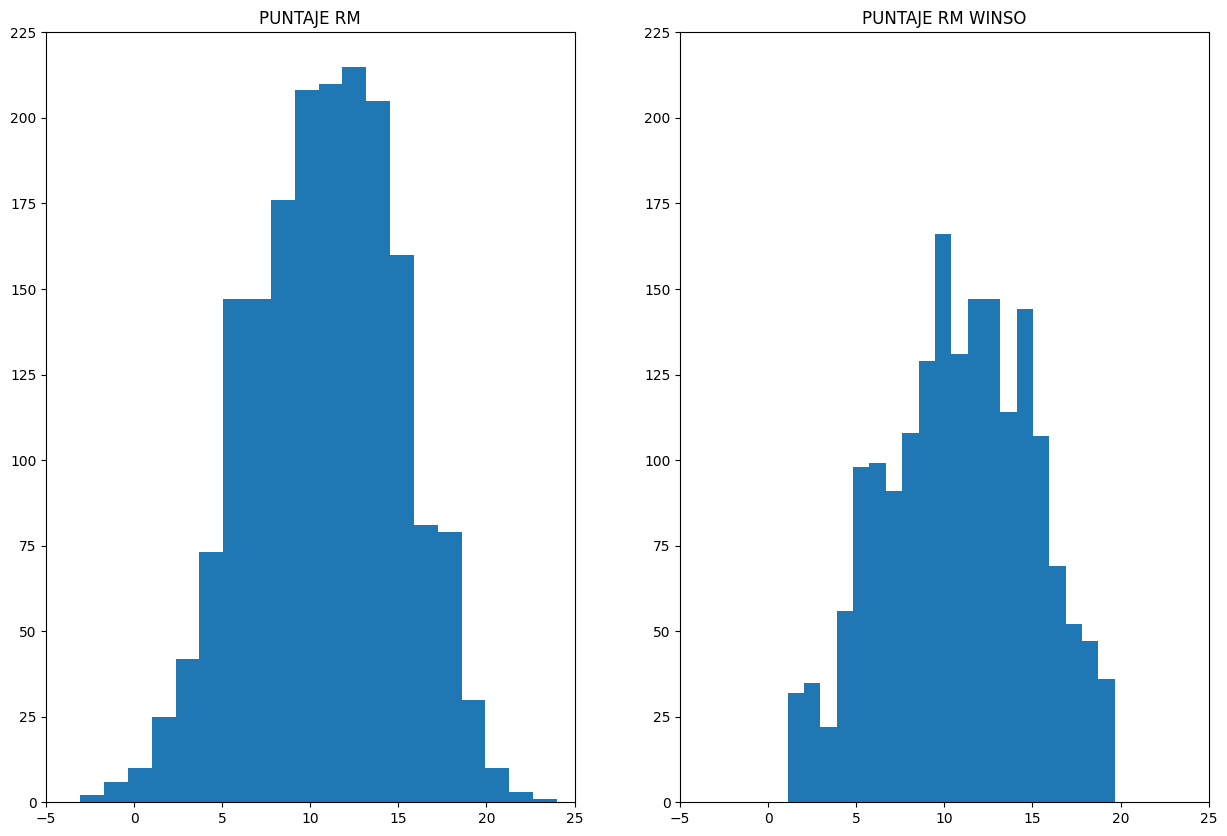

In [106]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].hist(datos1['PUNTAJE RM'], bins=20)
axs[0].set_title('PUNTAJE RM')
axs[1].hist(datos1['PUNTAJE RM WINSO'], bins=20)
axs[1].set_title('PUNTAJE RM WINSO')

for ax in axs:
    ax.set_xlim((-5,25))
    ax.set_ylim((0,225))
plt.show()

In [107]:
datos1['EDAD WINSO'] = winsorize(datos1['EDAD'], limits=[0.001, 0.01]) # winsorize con percentiles 0.1 y 99 #winsorizing asimétrico
np.percentile(datos1['EDAD'], [0.1,99])

array([17.  , 27.71])

In [108]:
datos1[['EDAD','EDAD WINSO']].sort_values('EDAD')

,EDAD,EDAD WINSO
0,17,17
1398,17,17
1399,17,17
364,17,17
363,17,17
...,...,...
494,38,28
1160,41,28
1349,41,28
1400,46,28


In [109]:
datos1[['EDAD','EDAD WINSO']].describe()

,EDAD,EDAD WINSO
count,1830.000000,1830.000000
mean,18.792896,18.734426
std,2.356257,1.945531
min,17.000000,17.000000
25%,17.000000,17.000000
50%,18.000000,18.000000
75%,19.000000,19.000000
max,46.000000,28.000000


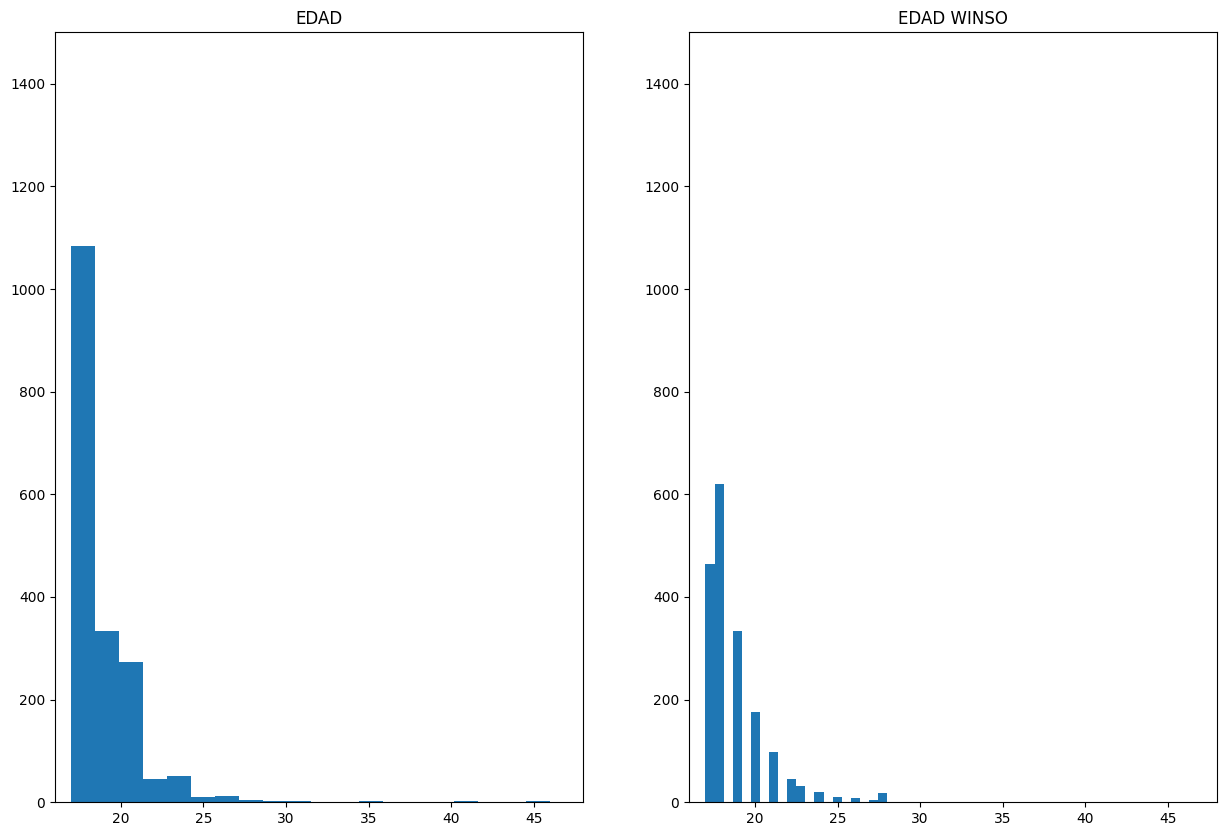

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].hist(datos1['EDAD'], bins=20)
axs[0].set_title('EDAD')
axs[1].hist(datos1['EDAD WINSO'], bins=20)
axs[1].set_title('EDAD WINSO')

for ax in axs:
    ax.set_xlim((16,48))
    ax.set_ylim((0,1500))
plt.show()

## Trimming

Es útil cuando los valores atípicos son el resultado de errores de medición o entrada de datos incorrecta, o tienen un impacto desproporcionado en los resultados del análisis. Por ejemplo, la presencia de outliers altera en demasía los supuestos de la regresión.

También se puede usar en caso se trate de valores atípicos debido a la variabilidad natural de los datos, teniendo siempre en cuenta que la eliminación de datos puede reducir el tamaño de la muestra y, en algunos casos, eliminar información importante.

In [111]:
# Calcular los valores de corte para la columna seleccionada
lower_cutoff, upper_cutoff = np.percentile(datos1['PUNTAJE RM'], [1,99])
lower_cutoff, upper_cutoff

(1.1216, 19.66)

In [112]:
trim = (datos1['PUNTAJE RM'] >= lower_cutoff) & (datos1['PUNTAJE RM'] <= upper_cutoff) # si se encuentra entre los P1 y P99
trim.head(10)

,PUNTAJE RM
0,False
1,False
2,True
3,True
4,True
5,False
6,True
7,True
8,True
9,False


In [113]:
datos1.loc[trim] # solo muestra los registros para los que TAX se encuentra entre su percentil 1 y 99

,EDAD,PUNTAJE RM,PUNTAJE RV,PUNTAJE BIOLOGÍA,PUNTAJE ECONOMÍA,TIEMPO,PUNTAJE RM WINSO,EDAD WINSO
2,23,19.15,17.15,1.49,0.83,7,19.15,23
3,18,16.49,15.32,5.00,2.00,2,16.49,18
4,20,17.98,16.81,2.49,1.66,4,17.98,20
6,19,17.49,14.98,5.00,0.83,2,17.49,19
7,18,19.32,17.98,6.00,0.83,2,19.32,18
...,...,...,...,...,...,...,...,...
1823,17,1.81,4.13,-0.51,0.83,1,1.81,17
1825,17,2.66,1.77,2.66,-0.51,1,2.66,17
1827,20,2.96,6.96,-0.68,-0.34,3,2.96,20
1828,19,2.64,3.94,0.32,-0.51,3,2.64,19


In [114]:
datos1.loc[trim].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 2 to 1829
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1796 non-null   int64  
 1   PUNTAJE RM        1796 non-null   float64
 2   PUNTAJE RV        1796 non-null   float64
 3   PUNTAJE BIOLOGÍA  1796 non-null   float64
 4   PUNTAJE ECONOMÍA  1796 non-null   float64
 5   TIEMPO            1796 non-null   int64  
 6   PUNTAJE RM WINSO  1796 non-null   float64
 7   EDAD WINSO        1796 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 126.3 KB


In [117]:
34/1830*100

1.8579234972677594